 # Exploring the Breast Cancer Dataset
 This is an atempt to explore using Data Science and Python de Breast Cancer Dataset 
 
 First at all we need to know the columns or features that we have in the dataset.
 The following list are the atributtes and a description: 
 1) ID number 
 2) Diagnosis (M = malignant, B = benign) 3-32)
 3) radius (mean of distances from center to points on the perimeter)
 4) texture (standard deviation of gray-scale values)
 5) perimeter
 6) area
 7) smoothness (local variation in radius lengths)
 8) compactness (perimeter^2 / area - 1.0)
 9) concavity (severity of concave portions of the contour)
 10) concave points (number of concave portions of the contour)
 11) symmetry
 12) fractal dimension ("coastline approximation" - 1)
 
 



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
path = "../input/data.csv"
import os
print(os.listdir("../input"))
%matplotlib inline
# Any results you write to the current directory are saved as output.

['data.csv']


## 1.Getting the data from the csv file 

In [2]:
breast_df = pd.read_csv(path,index_col='id')

## 2. Lets see information about the dataSet****

In [3]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

#### Results 
we can see that we have 569 rows of 33 features. Also we have 32 features with 569 non-null values of float64 type and the diagnosis that is the object type. 

Since we have no data the Unnamed: 32 column we can safely delete. 

In [4]:

breast_df.dropna(axis=1,inplace=True) 

In [5]:
# lets see again the df 
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

## 3. Lets explore the first and last 10 rows of the dataset


In [6]:
breast_df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [7]:
breast_df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.029820,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.492,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.896,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.205,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.026,8.758,118.80,0.006399,0.043100,0.07845,0.02624,0.02057,0.006213,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.061580,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


## 4. Lets have a summary statistics of the dataset

In [8]:
breast_df.describe(include='all').transpose() 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569,NaN,NaN,NaN,14.1273,3.52405,6.981,11.7,13.37,15.78,28.11
texture_mean,569,NaN,NaN,NaN,19.2896,4.30104,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569,NaN,NaN,NaN,91.969,24.299,43.79,75.17,86.24,104.1,188.5
area_mean,569,NaN,NaN,NaN,654.889,351.914,143.5,420.3,551.1,782.7,2501
smoothness_mean,569,NaN,NaN,NaN,0.0963603,0.0140641,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569,NaN,NaN,NaN,0.104341,0.0528128,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569,NaN,NaN,NaN,0.0887993,0.0797198,0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569,NaN,NaN,NaN,0.0489191,0.0388028,0,0.02031,0.0335,0.074,0.2012
symmetry_mean,569,NaN,NaN,NaN,0.181162,0.0274143,0.106,0.1619,0.1792,0.1957,0.304


### Results 
Here we can see the statistics for each feature such as count, mean, std and percentiles. 
Something interesting is that the feature area_se has a std of 43 


### Lets visualize the total number of benigns and maligns 

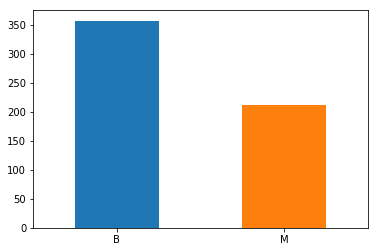

In [9]:
breast_df['diagnosis'].value_counts().plot(kind='bar', rot=0)

## 5. Lets do an analysis of the features of the dataset to see correlations, histograms, etc 
in this part we will se the features of the breast dataset to know about if it has patterns in data doing some visualizations. 

In [10]:
#first at all lets save the all columns except the diagnosis in a variable 
columns = [column for column in breast_df.columns if column!='diagnosis']



### Let visualize the correlation between each feature in the dataset. 

In [11]:
def plot_heat_map(df,xlabel,title):
    plt.figure(figsize=(14,7))
    plt.title(title)
    sns.heatmap(data=df,cmap="YlGnBu")
    plt.xlabel(xlabel)

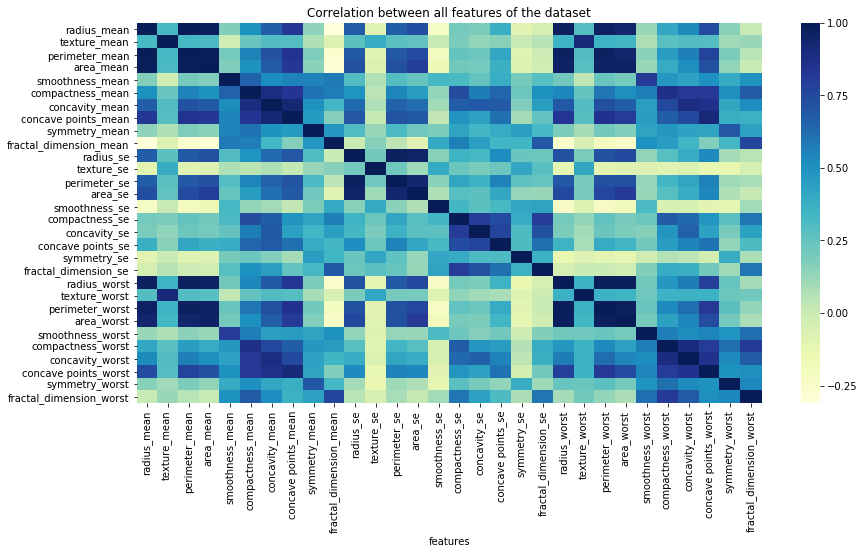

In [12]:
plot_heat_map(breast_df[columns].corr(),'features','Correlation between all features of the dataset')

lets do the same plot with the 10 first columns 

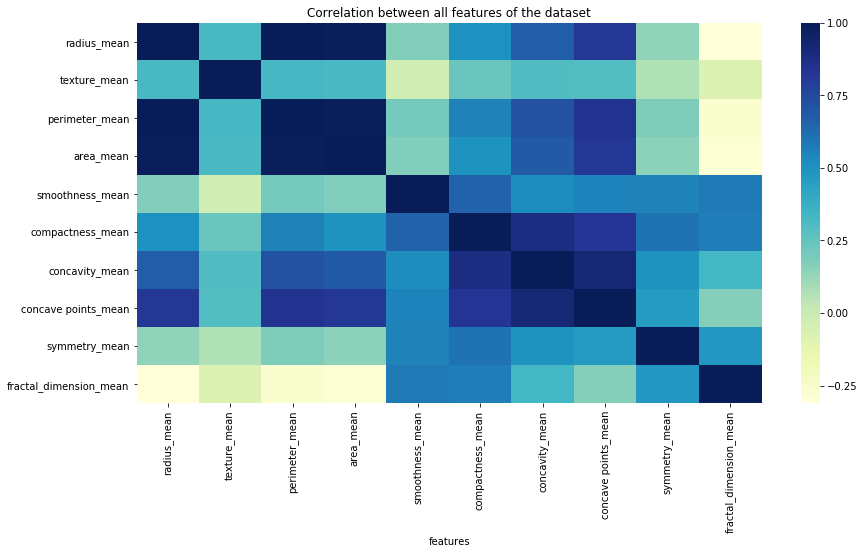

In [13]:
plot_heat_map(breast_df[columns[:10]].corr(),'features','Correlation between all features of the dataset')

Since we have some features with positive correlations lets save a sample of these features to do some scatter plots and see the relationship between variables. 

In [14]:

features_y = ['radius_mean','area_mean','concave points_mean']


In [15]:
def plot_scatter_plots(df,column_x,columns_y):
   
    f, axes = plt.subplots(len(columns_y),1, figsize=(7, 7), sharex=True)
    sns.despine(left=True)
    for i in range(len(columns_y)):
       
        sns.scatterplot(x=column_x,y=columns_y[i],data=df,ax=axes[i],hue='diagnosis')
  
    plt.show() 
        
        
    
    

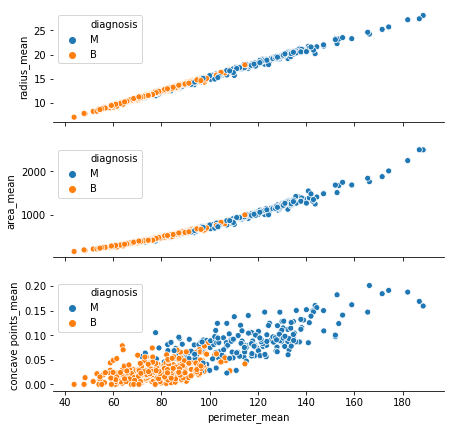

In [16]:
plot_scatter_plots(breast_df,"perimeter_mean",features_y)

### lets do the same plot with two features with not correlation between the two 


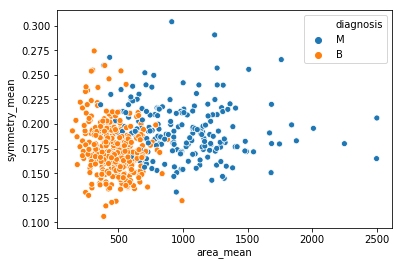

In [17]:
sns.scatterplot(data=breast_df,x='area_mean',y='symmetry_mean',hue='diagnosis'); 

### Results 
here we can see interesting results about about the relationship between the perimeter_mean, the three other  features and the diagnosis.

 we can do it for all the columns in the dataset!! 

## Plotting box plots of a set of the dataset in order to find outliers. 
box-plots help us to know about the percentiles of the dataset and to know about outliers on it. 

lets plot the box-plot of the first 3 features

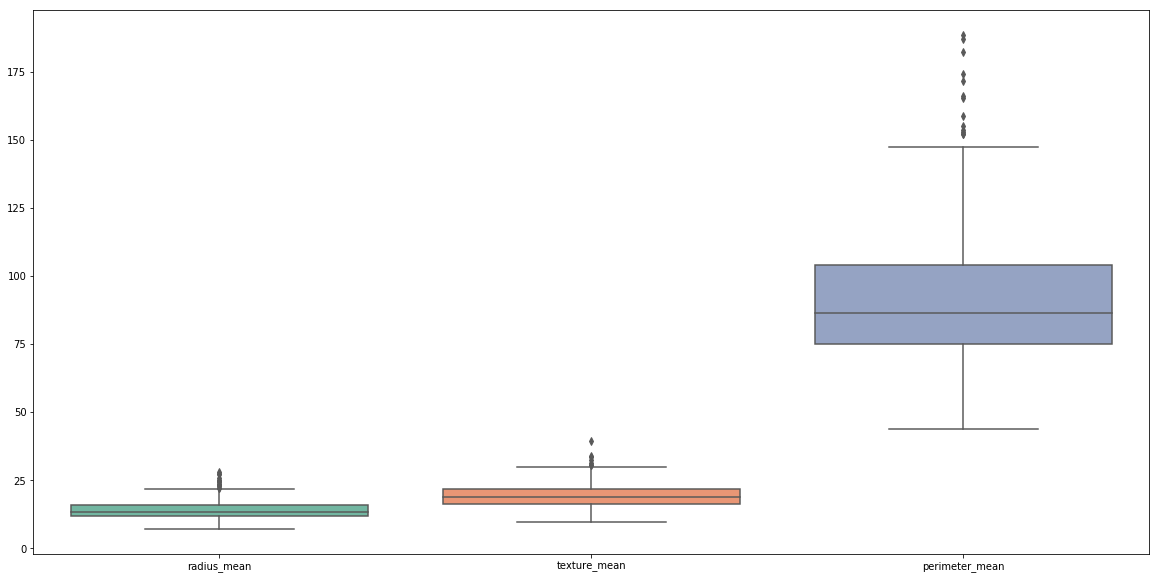

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=breast_df[columns[:3]],orient="v", palette="Set2");

### Results 
here we can see that in the perimeter_mean atributte we have some extreme values.  
we can do the same with others columns



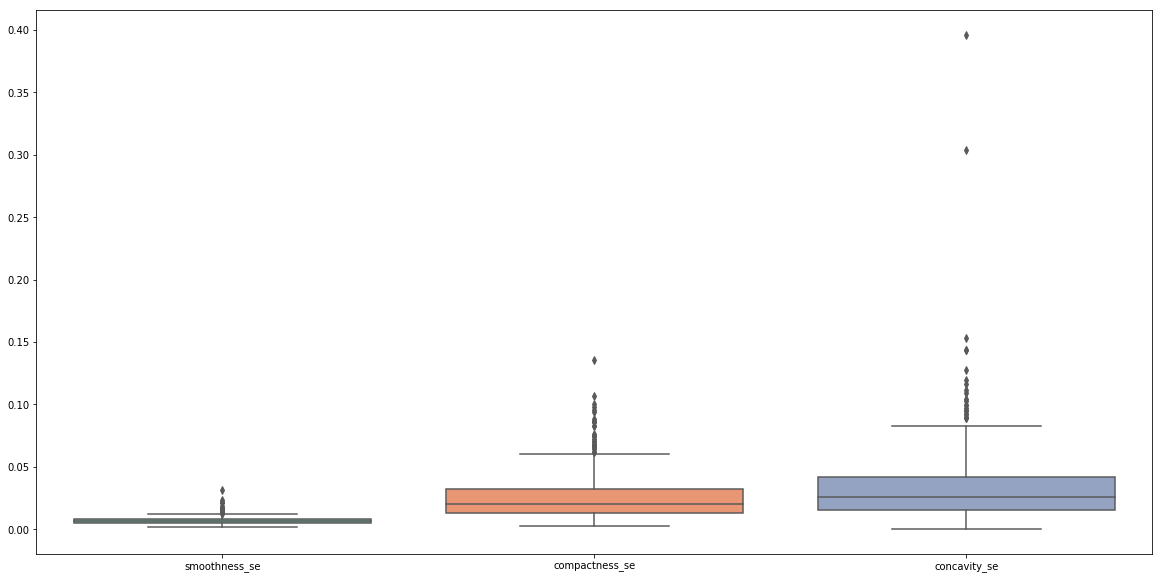

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=breast_df[columns[14:17]],orient="v", palette="Set2");

### Filtering the data that are greater than the third quantile(data>75% of the data)
Since we can see that some features have extreme values, that we can consider outliers, we can filter the two variables of concavity_se and perimeter_mean

In [20]:
df_perimeter = breast_df[breast_df.perimeter_mean>breast_df.perimeter_mean.quantile(0.75)]
print(f"the third quantile of the perimer_mean is {breast_df.perimeter_mean.quantile(0.75)}")
print("number or rows that have the perimeter_mean greater than of third quantile ")
print("the data")
df_perimeter.head()

the third quantile of the perimer_mean is 104.1
number or rows that have the perimeter_mean greater than of third quantile 
the data


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84358402,M,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
844359,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [21]:
df_concavity = breast_df[breast_df.concavity_se>breast_df.concavity_se.quantile(0.75)]
print(f"the third quantile of the concavity_se is {breast_df.concavity_se.quantile(0.75)}")
print("number or rows that have the concavity_se greater than of third quantile ")
print("the data")
df_concavity.head()

the third quantile of the concavity_se is 0.04205
number or rows that have the concavity_se greater than of third quantile 
the data


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
846226,M,19.17,24.80,132.40,1123.0,0.0974,0.2458,0.2065,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230


## Grouping and Aggregations 


In [22]:
def group_dianosis_by_mean_of(variables):
    for var in variables:
        print(f"grouping the diagnosis with average of {var} ")
        print(breast_df.groupby(['diagnosis'])[var].mean())

In [23]:
group_dianosis_by_mean_of(columns)

grouping the diagnosis with average of radius_mean 
diagnosis
B    12.146524
M    17.462830
Name: radius_mean, dtype: float64
grouping the diagnosis with average of texture_mean 
diagnosis
B    17.914762
M    21.604906
Name: texture_mean, dtype: float64
grouping the diagnosis with average of perimeter_mean 
diagnosis
B     78.075406
M    115.365377
Name: perimeter_mean, dtype: float64
grouping the diagnosis with average of area_mean 
diagnosis
B    462.790196
M    978.376415
Name: area_mean, dtype: float64
grouping the diagnosis with average of smoothness_mean 
diagnosis
B    0.092478
M    0.102898
Name: smoothness_mean, dtype: float64
grouping the diagnosis with average of compactness_mean 
diagnosis
B    0.080085
M    0.145188
Name: compactness_mean, dtype: float64
grouping the diagnosis with average of concavity_mean 
diagnosis
B    0.046058
M    0.160775
Name: concavity_mean, dtype: float64
grouping the diagnosis with average of concave points_mean 
diagnosis
B    0.025717
M    0.0

In [24]:
def group_dianosis_by_sum_of(variables):
    for var in variables:
        print(f"grouping the diagnosis with average of {var} ")
        print(breast_df.groupby(['diagnosis'])[var].sum())

In [25]:
group_dianosis_by_sum_of(columns)

grouping the diagnosis with average of radius_mean 
diagnosis
B    4336.309
M    3702.120
Name: radius_mean, dtype: float64
grouping the diagnosis with average of texture_mean 
diagnosis
B    6395.57
M    4580.24
Name: texture_mean, dtype: float64
grouping the diagnosis with average of perimeter_mean 
diagnosis
B    27872.92
M    24457.46
Name: perimeter_mean, dtype: float64
grouping the diagnosis with average of area_mean 
diagnosis
B    165216.1
M    207415.8
Name: area_mean, dtype: float64
grouping the diagnosis with average of smoothness_mean 
diagnosis
B    33.01452
M    21.81448
Name: smoothness_mean, dtype: float64
grouping the diagnosis with average of compactness_mean 
diagnosis
B    28.59021
M    30.77981
Name: compactness_mean, dtype: float64
grouping the diagnosis with average of concavity_mean 
diagnosis
B    16.442571
M    34.084240
Name: concavity_mean, dtype: float64
grouping the diagnosis with average of concave points_mean 
diagnosis
B     9.181114
M    18.653880
Name

### Lets use kernel density plots to determine which features can be used to determine if a tumor is benign or malign

In [26]:
def plot_kernel_densite_plots(df_m,df_b,columns):
              
    for i in range(10):            
        sns.kdeplot(data=df_b[columns[i]],shade=True,label='benign') 
        sns.kdeplot(data=df_m[columns[i]],shade=True,label='malign')
        plt.title(columns[i])
        plt.legend()
        plt.show() 
            
            
  
   
    
    
    

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


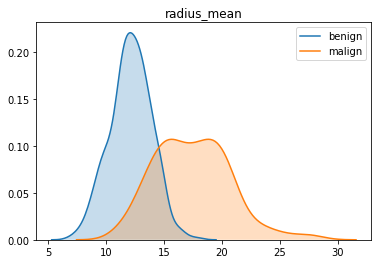

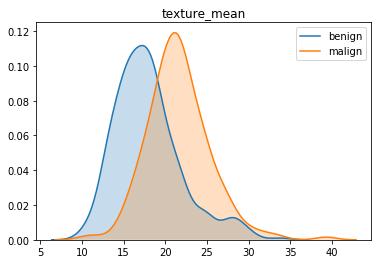

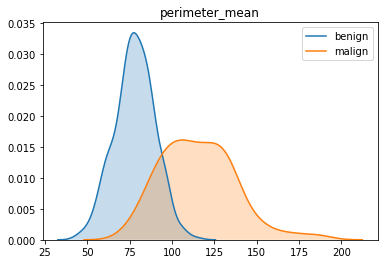

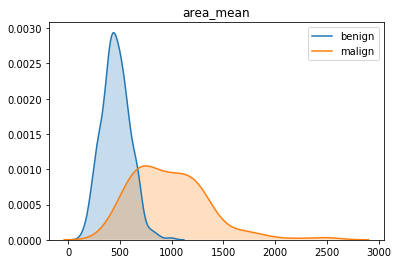

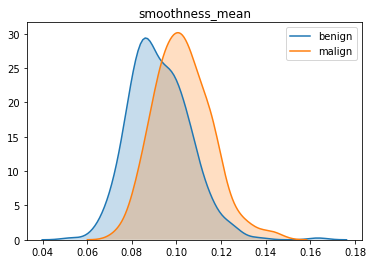

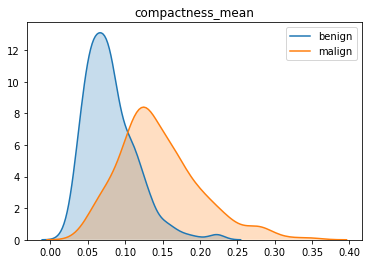

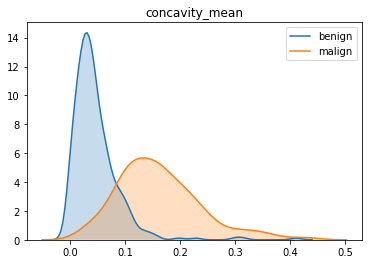

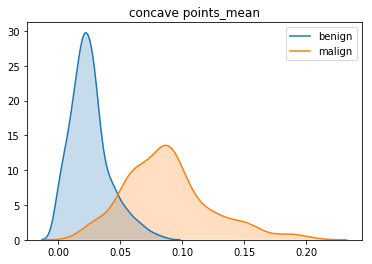

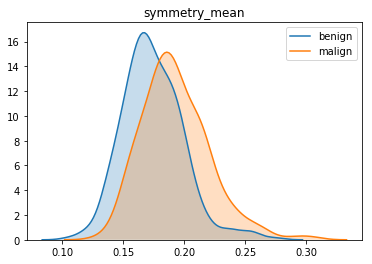

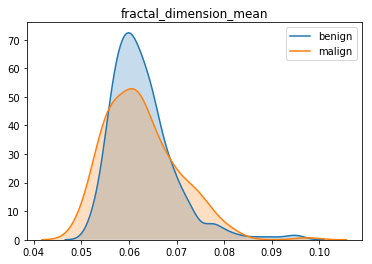

In [27]:
df_malign = breast_df[breast_df.diagnosis=='M']
df_benign = breast_df[breast_df.diagnosis=='B']
plot_kernel_densite_plots(df_malign,df_benign,columns[:10])